In [1]:
#Install imageio package
!pip install imageio

tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.1 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 58.0.4 which is incompatible.
jupyter-console 6.5.1 has requirement ipykernel>=6.14, but you'll have ipykernel 5.5.5 which is incompatible.
jupyter-console 6.5.1 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.8.1 which is incompatible.
jupyter-console 6.5.1 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


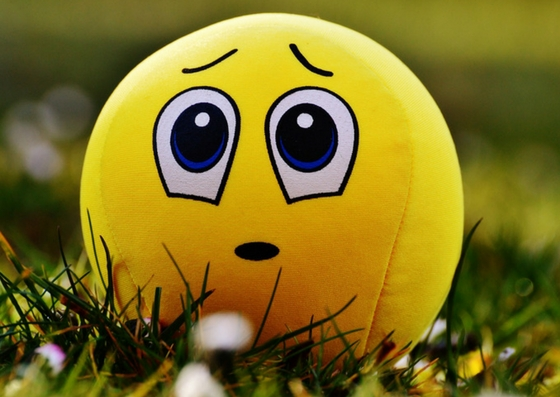

In [ ]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img="https://www.lovethisimages.com/wp-content/uploads/2018/04/sorry-images-download-1.jpg"
dp.Image(requests.get(img).content)

In [ ]:
#Read the image using imgaeio package's imread method and URI from web using 
source_img = imageio.imread(img)

In [ ]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)


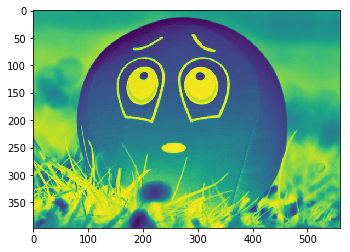

In [ ]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

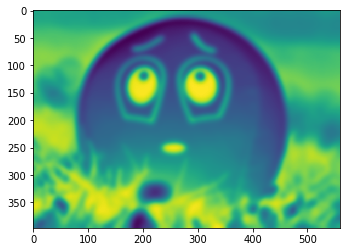

In [ ]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [ ]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [ ]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

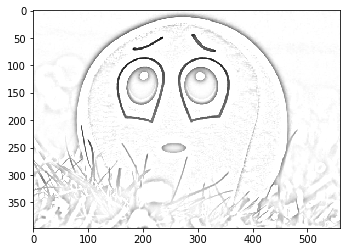

In [ ]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [ ]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)